# CONCRETE STRENGTH PREDICTION

# 1.Loading libraries and data set

In [719]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("C:/Users/User/Jeslin_data/concrete_data.csv")
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [720]:
df.shape

(1030, 9)

In [721]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [722]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [723]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [724]:
# CHECKING FOR NULL VALUES AND DUPLICATES

In [725]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [726]:
df.duplicated().sum()

25

In [727]:
df=df.drop_duplicates()

In [728]:
df.duplicated().sum()

0

In [729]:
df.shape

(1005, 9)

## EXLORATORY DATA ANALYSIS

array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'blast_furnace_slag'}>,
        <AxesSubplot:title={'center':'fly_ash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplasticizer'}>,
        <AxesSubplot:title={'center':'coarse_aggregate'}>],
       [<AxesSubplot:title={'center':'fine_aggregate '}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'concrete_compressive_strength'}>]],
      dtype=object)

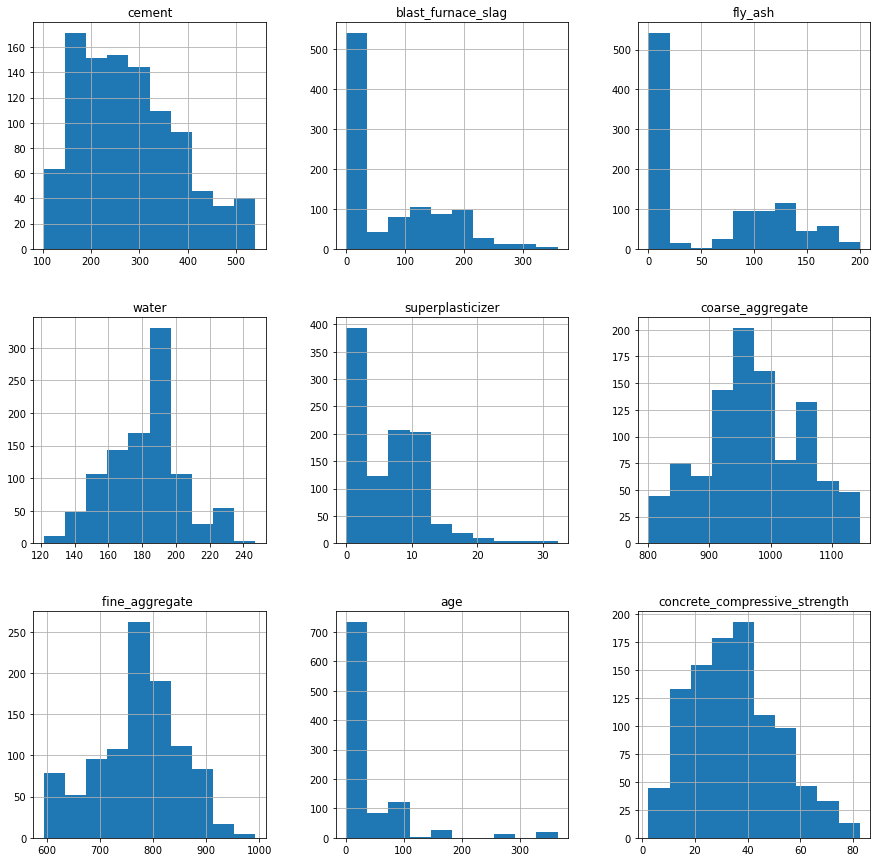

In [730]:
#HISTOGRAM 
df.hist(figsize=(15, 15))

In [731]:
# CHECKING FOR OUTLIER 

In [732]:
#BOX PLOT

In [733]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



<AxesSubplot:xlabel='age'>

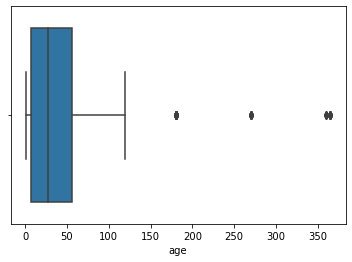

In [734]:
sns.boxplot(x='age',data=df, orient='h')

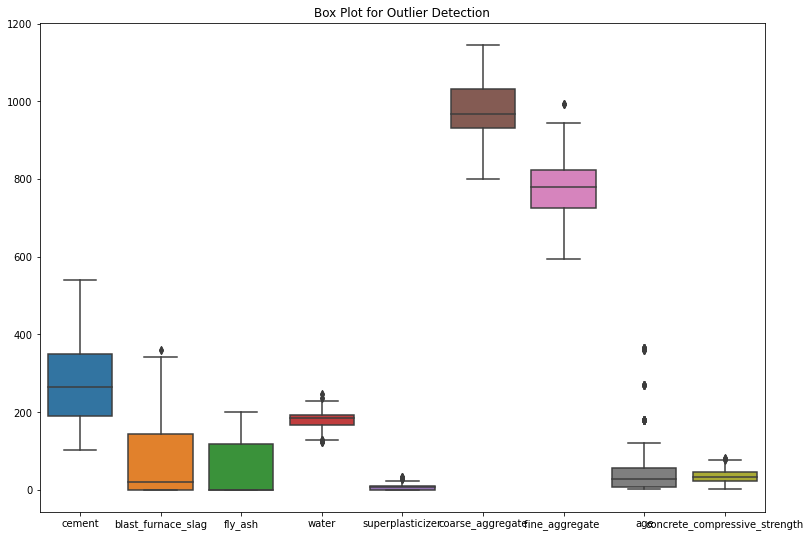

In [735]:
# Method 2: Box plot to visualize outliers
plt.figure(figsize=(13, 9))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Box Plot for Outlier Detection')
plt.show()


In [736]:
#Treating outlier
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

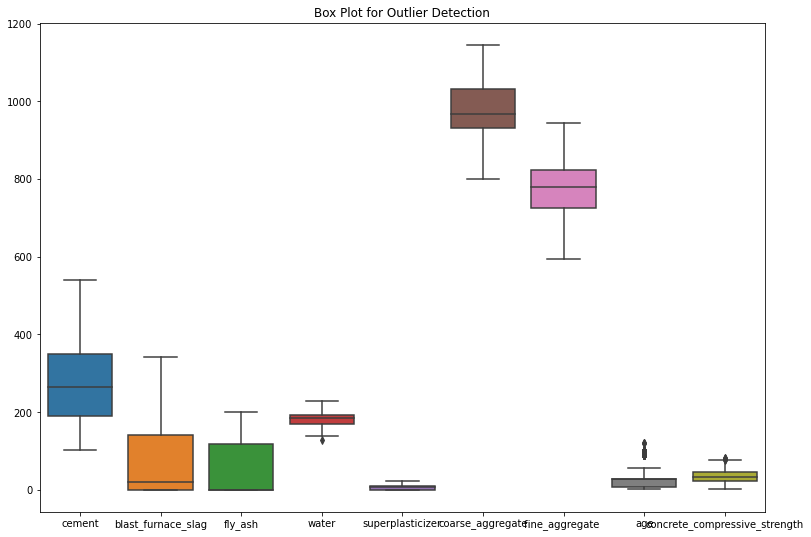

In [737]:
# Method 2: Box plot to visualize outliers
plt.figure(figsize=(13, 9))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Box Plot for Outlier Detection')
plt.show()

<AxesSubplot:xlabel='age'>

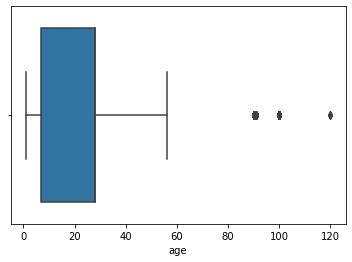

In [738]:
sns.boxplot(x='age',data=df, orient='h')

<AxesSubplot:>

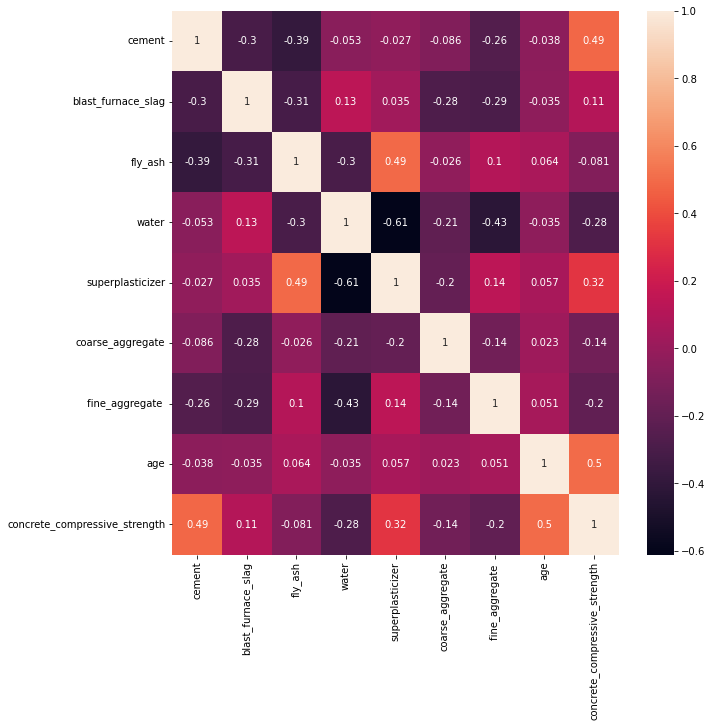

In [739]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [740]:
df.drop(["fly_ash"],axis=1,inplace=True)

<AxesSubplot:>

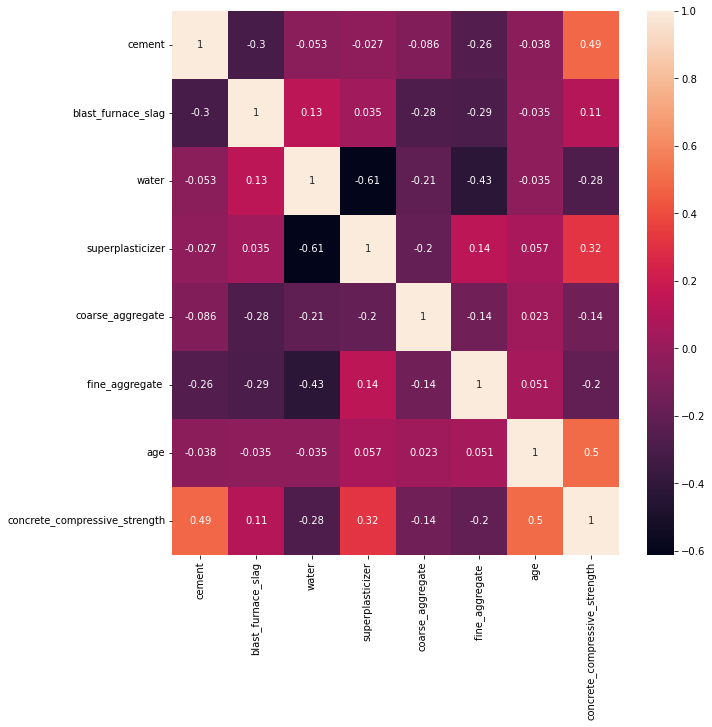

In [741]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

FEATURE ENGINEERING

In [742]:
#Splitting the data into independent and dependent attributes


#independent and dependent variables
X = df.drop('concrete_compressive_strength', axis = 1)
Y = df['concrete_compressive_strength']

In [743]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

In [744]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# MODEL TRAINING

In [745]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [746]:
Y_train

79     41.30
29     38.60
304    23.14
531    23.85
676    15.75
       ...  
115    35.10
294     7.40
885    26.23
459    55.02
110    38.00
Name: concrete_compressive_strength, Length: 804, dtype: float64

In [747]:
X_train

,cement,blast_furnace_slag,water,superplasticizer,coarse_aggregate,fine_aggregate,age
79,531.3,0.0,141.8,6.1,852.1,893.7,3
29,475.0,0.0,228.0,0.0,932.0,594.0,7
304,277.1,0.0,160.6,11.8,973.9,875.6,3
531,436.0,0.0,218.0,0.0,838.4,719.7,28
676,166.8,250.2,203.5,0.0,975.6,692.6,7
...,...,...,...,...,...,...,...
115,337.9,189.0,174.9,9.5,944.7,755.8,7
294,168.9,42.2,158.3,10.8,1080.8,796.2,3
885,153.0,145.0,178.0,8.0,867.0,824.0,28
459,165.0,128.5,175.1,8.1,1005.8,746.6,100


In [748]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [749]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

In [750]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

RANDOM FOREST

In [752]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [753]:
rf_pred = rf_model.predict(X_test)

In [755]:
rf_model.score(X_train, y_train)

0.9810816210798723

In [756]:
RF_acc=metrics.r2_score(y_test, rf_pred)
RF_acc

0.8827343261601996

In [757]:
results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': RF_acc},index={'1'})
results = results_1[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.882734


Support Vector Machine

In [759]:
from sklearn.svm import SVR
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)


SVR(kernel='linear')

In [760]:
svm_pred = svm_model.predict(X_test)

In [761]:
acc_SVR=metrics.r2_score(y_test, svm_pred)
acc_SVR

0.6990933164913745

In [762]:
random_re = pd.DataFrame({'Algorithm': ['Support Vector Machine'], 'accuracy': acc_SVR},index={'2'})
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.882734
2,Support Vector Machine,0.699093


Bagging regressor

In [763]:
from sklearn.ensemble import BaggingRegressor

bg_model = BaggingRegressor()
bg_model.fit(X_train,y_train)

BaggingRegressor()

In [764]:
br_pred = bg_model.predict(X_test)

In [765]:
acc_BR=metrics.r2_score(y_test, br_pred)
acc_BR

0.8718981920873106

In [766]:
random_re = pd.DataFrame({'Algorithm': ['Bagging regressor'], 'accuracy': acc_BR},index={'3'})
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.882734
2,Support Vector Machine,0.699093
3,Bagging regressor,0.871898


# Plot values vs. actual values

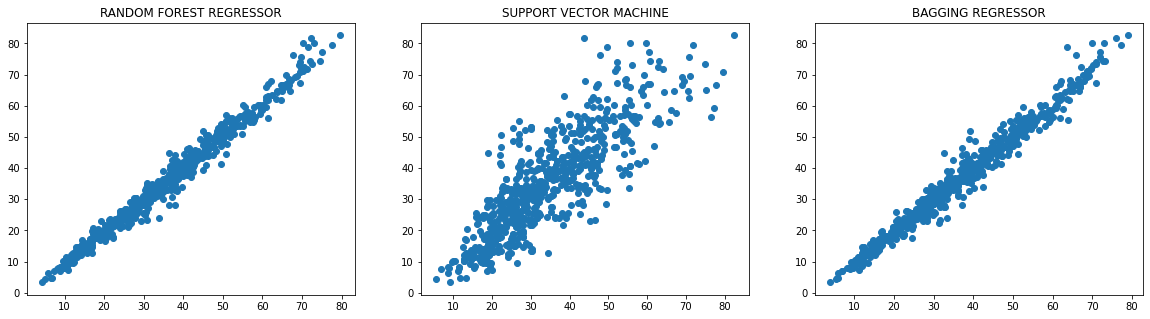

In [785]:

plt.figure(figsize = (20,5))

   
plt.subplot(1,3,1)
plt.scatter(rf_model.predict(X_train), y_train)
plt.title('RANDOM FOREST REGRESSOR')

plt.subplot(1,3,2)
plt.scatter(svm_model.predict(X_train), y_train)
plt.title('SUPPORT VECTOR MACHINE')


plt.subplot(1,3,3)
plt.scatter(bg_model.predict(X_train), y_train)
plt.title('BAGGING REGRESSOR')
plt.show()

Text(0.5, 1.0, 'BAGGING REGRESSOR')

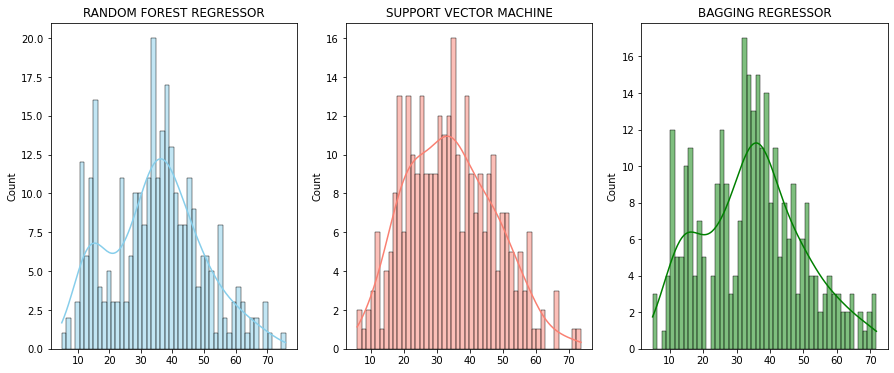

In [784]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))


sns.histplot(rf_pred, bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('RANDOM FOREST REGRESSOR')


sns.histplot(svm_pred, bins=50, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('SUPPORT VECTOR MACHINE')

sns.histplot(br_pred, bins=50, kde=True, color='green', ax=axes[2])
axes[2].set_title('BAGGING REGRESSOR')